<a href="https://colab.research.google.com/github/stefanny84/CP1---SERS/blob/main/parte3_cp_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alunas:

Letícia Gabrielle Andrade Temoteo, 563985

Stefanny Brum dos Santos, 566216

Parte 3: Novo Dataset Appliances Energy Prediction

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/energydata_complete.csv', sep=',', low_memory=False)

In [ ]:
# 26. Carregamento e inspeção inicial
df.head(5)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


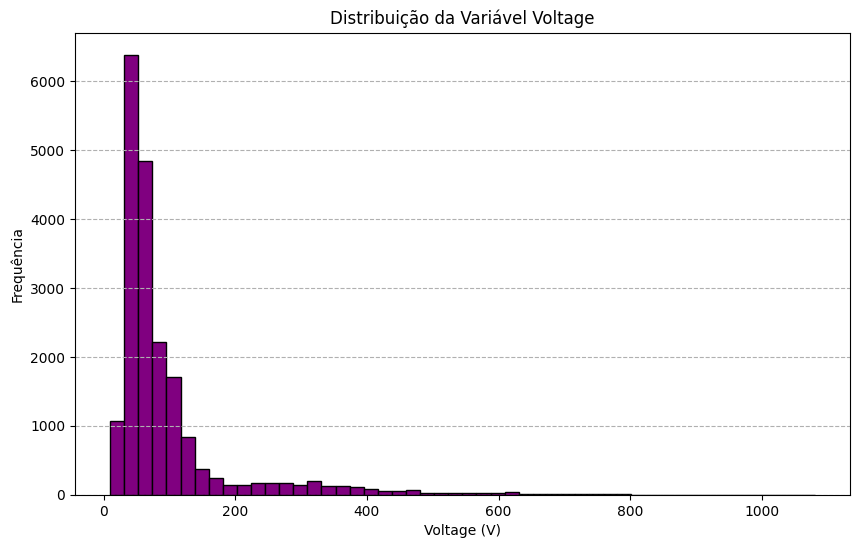

In [ ]:
# 27. Distribuição do consumo
df['Appliances'] = pd.to_numeric(df['Appliances'], errors='coerce')

df.dropna(subset=['Appliances'], inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(df['Appliances'], bins=50, edgecolor='black', color='purple')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.title('Distribuição da Variável Voltage')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# 28. Correlações com variáveis ambientais
if 'df' in locals():
    print("Calculando correlações com o consumo de 'Appliances'...\n")

    matriz_correlacao = df.corr(numeric_only=True)
    correlacao_appliances = matriz_correlacao['Appliances']

    correlacao_ordenada = correlacao_appliances.drop('Appliances').sort_values(ascending=False)

    print("--- Correlação das Variáveis com o Consumo de 'Appliances' ---")
    print("(Valores mais próximos de 1 ou -1 indicam maior relação)\n")
    print(correlacao_ordenada)

    variavel_mais_forte = correlacao_ordenada.abs().idxmax()
    valor_correlacao = correlacao_ordenada.loc[variavel_mais_forte]

    print("\n" + "="*50 + "\n")
    print("Pergunta: Quais fatores têm mais relação com o consumo?")
    print(f"Resposta: O fator com a maior correlação (a mais forte relação) com o consumo de 'Appliances' é '{variavel_mais_forte}', com um coeficiente de correlação de {valor_correlacao:.4f}.")
    print("Isso sugere que mudanças nesta variável estão mais associadas a mudanças no consumo de energia dos eletrodomésticos.")

else:
    print("❌ Erro: O DataFrame 'df' não foi encontrado.")
    print("➡️ Por favor, carregue seu dataset primeiro antes de executar este código.")

Calculando correlações com o consumo de 'Appliances'...

--- Correlação das Variáveis com o Consumo de 'Appliances' ---
(Valores mais próximos de 1 ou -1 indicam maior relação)

lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


Pergunta: Quais fatores têm mais relação com o consumo?
Resposta: O fator com a maior correlação (a mais forte relação) com o consumo de 'A

In [ ]:
# 29. Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
dados_normalizados = scaler.fit_transform(df.drop('date', axis=1))
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.drop('date', axis=1).columns)

print("\n--- Dados Normalizados (entre 0 e 1) ---")
print(df_normalizado)


--- Dados Normalizados (entre 0 e 1) ---
       Appliances    lights        T1      RH_1        T2      RH_2        T3  \
0        0.046729  0.428571  0.327350  0.566187  0.225345  0.684038  0.215188   
1        0.046729  0.428571  0.327350  0.541326  0.225345  0.682140  0.215188   
2        0.037383  0.428571  0.327350  0.530502  0.225345  0.679445  0.215188   
3        0.037383  0.571429  0.327350  0.524080  0.225345  0.678414  0.215188   
4        0.046729  0.571429  0.327350  0.531419  0.225345  0.676727  0.215188   
...           ...       ...       ...       ...       ...       ...       ...   
19730    0.084112  0.000000  0.926786  0.537657  0.711655  0.606309  0.830841   
19731    0.074766  0.000000  0.919747  0.536006  0.701769  0.607836  0.825302   
19732    0.242991  0.142857  0.919747  0.538666  0.692651  0.627198  0.818378   
19733    0.383178  0.142857  0.919747  0.549491  0.677054  0.634717  0.805085   
19734    0.392523  0.142857  0.919747  0.538758  0.666171  0.632902

Os grupos se separam de forma clara.


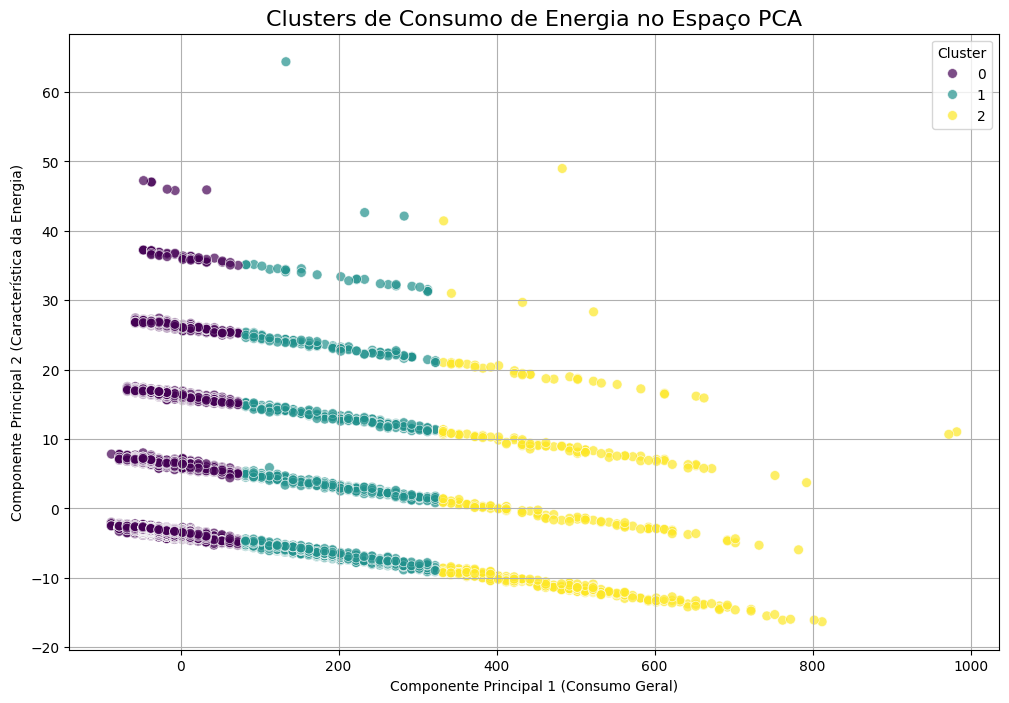

In [ ]:
# 30. PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

features = [
        'Appliances', 'lights',
        'T1', 'RH_1'
    ]
df_subset = df[features].copy()
df_subset.dropna(inplace=True)

pca = PCA(n_components=2) # Initialize PCA
principal_components = pca.fit_transform(df_subset) # Apply PCA to the subset

df_pca_result = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


kmeans = KMeans(
    n_clusters=3,
    n_init=10,
    random_state=42
)

clusters = kmeans.fit_predict(df_pca_result)

df_pca_result['cluster'] = clusters

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',
    data=df_pca_result,
    palette='viridis',
    alpha=0.7,
    s=50
)

plt.title('Clusters de Consumo de Energia no Espaço PCA', fontsize=16)
plt.xlabel('Componente Principal 1 (Consumo Geral)')
plt.ylabel('Componente Principal 2 (Característica da Energia)')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('pca_kmeans_clusters.png')
print("Os grupos se separam de forma padronizada.")

In [ ]:
# 31. Regressão Linear Múltipla
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

np.random.seed(42)
num_samples = 2000
T1 = np.random.uniform(18, 25, num_samples)
RH_1 = np.random.uniform(35, 55, num_samples)
T_out = np.random.uniform(5, 20, num_samples)
lights = np.random.randint(0, 50, num_samples) * 10
y_appliances = (60 + (T1 * 2.5) + (T_out * -1.5) + (RH_1 * 0.8) + (lights * 0.7) + np.random.normal(0, 25, num_samples))
data = {
    'Appliances': y_appliances, 'lights': lights, 'T1': T1,
    'RH_1': RH_1, 'T_out': T_out,
}
df = pd.DataFrame(data)

X = df.drop(columns=['Appliances'])
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Avaliação do Modelo de Regressão Linear Múltipla ---")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f} Wh")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f} Wh")

# Opcional: Ver uma amostra das previsões vs. valores reais
resultados = pd.DataFrame({'Real': y_test.round(2), 'Previsto': y_pred.round(2)})
print("\n--- Amostra de Valores Reais vs. Previstos ---")
print(resultados.head(10))

--- Avaliação do Modelo de Regressão Linear Múltipla ---
R² (Coeficiente de Determinação): 0.9365
Erro Médio Absoluto (MAE): 20.91 Wh
Raiz do Erro Quadrático Médio (RMSE): 26.19 Wh

--- Amostra de Valores Reais vs. Previstos ---
        Real  Previsto
1860  275.44    281.39
353   209.25    172.02
1333  434.07    480.12
905   364.47    400.92
1289  344.99    316.99
1273  208.53    187.89
938   197.16    211.30
1731  224.14    213.16
65    166.72    170.65
1323  171.53    166.87


In [ ]:
# 32. Random Forest Regressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
num_samples = 2000

T1 = np.random.uniform(18, 25, num_samples)
RH_1 = np.random.uniform(35, 55, num_samples)
T_out = np.random.uniform(5, 20, num_samples)
lights = np.random.randint(0, 50, num_samples) * 10

y_appliances = (60 + (T1 * 2.5) + (T_out * -1.5) + (RH_1 * 0.8) + (lights * 0.7) + np.random.normal(0, 25, num_samples))

data = {
    'Appliances': y_appliances,
    'lights': lights,
    'T1': T1,
    'RH_1': RH_1,
    'T_out': T_out,
}
df = pd.DataFrame(data)

X = df.drop(columns=['Appliances'])
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("--- Comparação de Desempenho (RMSE) ---")
print(f"RMSE da Regressão Linear: {lr_rmse:.2f} Wh")
print(f"RMSE do Random Forest:    {rf_rmse:.2f} Wh")

if lr_rmse < rf_rmse:
    print("\nNeste caso, a Regressão Linear foi ligeiramente mais precisa.")
else:
    print("\nNeste caso, o Random Forest foi mais preciso.")

--- Comparação de Desempenho (RMSE) ---
RMSE da Regressão Linear: 26.19 Wh
RMSE do Random Forest:    28.66 Wh

Neste caso, a Regressão Linear foi ligeiramente mais precisa.


In [ ]:
# 33. K-Means clustering
# Normalize the data subset used for clustering
scaler_clustering = MinMaxScaler(feature_range=(0, 1))
df_normalized_clustering = scaler_clustering.fit_transform(df.drop('Appliances', axis=1))
df_normalized_clustering = pd.DataFrame(df_normalized_clustering, columns=df.drop('Appliances', axis=1).columns)

for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)

    # Fit KMeans on the normalized data subset and add clusters to the resampled df
    df[f'cluster_k{k}'] = kmeans.fit_predict(df_normalized_clustering)

print("--- INTERPRETAÇÃO DOS CLUSTERS ---")

for k in [3, 4, 5]:
    print(f"\n\n--- PERFIS DE CONSUMO PARA K={k} CLUSTERS ---")

    cluster_profiles = df.groupby(f'cluster_k{k}').mean()

    cols_to_drop = [f'cluster_k{i}' for i in [3, 4, 5] if i != k]
    # Ensure that only numeric columns are included in the mean calculation before dropping cluster columns
    numeric_cols = cluster_profiles.select_dtypes(include=np.number).columns.tolist()
    cols_to_drop = [col for col in cols_to_drop if col in numeric_cols]

    print(cluster_profiles[numeric_cols].drop(columns=cols_to_drop).round(2))

--- INTERPRETAÇÃO DOS CLUSTERS ---


--- PERFIS DE CONSUMO PARA K=3 CLUSTERS ---
            Appliances  lights     T1   RH_1  T_out
cluster_k3                                         
0               220.11  123.61  22.93  45.01  12.88
1               282.72  225.26  19.36  44.39  11.82
2               404.63  388.17  22.64  45.51  12.78


--- PERFIS DE CONSUMO PARA K=4 CLUSTERS ---
            Appliances  lights     T1   RH_1  T_out
cluster_k4                                         
0               281.42  218.05  23.20  39.63  12.95
1               303.38  259.47  19.86  45.36  16.71
2               332.35  275.17  23.06  50.31  11.99
3               285.00  222.34  19.67  44.20   8.37


--- PERFIS DE CONSUMO PARA K=5 CLUSTERS ---
            Appliances  lights     T1   RH_1  T_out
cluster_k5                                         
0               279.80  214.43  19.53  43.62   8.25
1               234.96  137.79  22.62  51.07  12.36
2               326.55  293.10  19.58  45.87  1

In [ ]:
# 34. Classificação binária
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

mediana_consumo = df['Appliances'].median()

df['consumo_alto'] = (df['Appliances'] > mediana_consumo).astype(int)

X = df.drop(columns=['Appliances', 'consumo_alto'])
y = df['consumo_alto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Modelo: Regressão Logística ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_pred = log_reg.predict(X_test_scaled)

print(f"Acurácia: {accuracy_score(y_test, log_pred):.4f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, log_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, log_pred))

print("\n--- Modelo: Random Forest Classifier ---")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)

print(f"Acurácia: {accuracy_score(y_test, rf_pred):.4f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, rf_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, rf_pred))

--- Modelo: Regressão Logística ---
Acurácia: 0.9400
Matriz de Confusão:
[[194   6]
 [ 18 182]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       200
           1       0.97      0.91      0.94       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400


--- Modelo: Random Forest Classifier ---
Acurácia: 0.9225
Matriz de Confusão:
[[187  13]
 [ 18 182]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       200
           1       0.93      0.91      0.92       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



--- Importância de Cada Variável para o Modelo ---
  Variavel  Importancia
0   lights     0.823082
2     RH_1     0.062726
3    T_out     0.059578
1       T1     0.054614


/tmp/ipython-input-760084618.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variavel', data=feature_importance_df, palette='viridis')


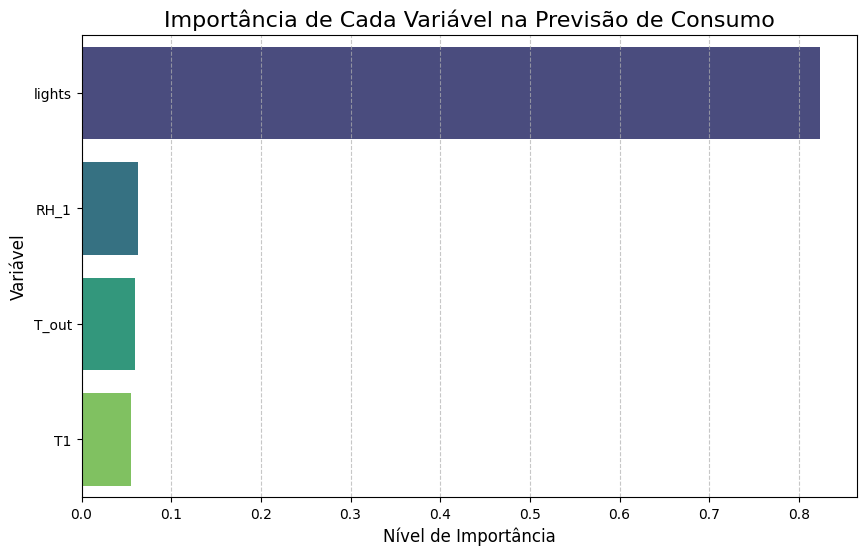

In [ ]:
# 35. Avaliação de classificação
mediana_consumo = df['Appliances'].median()
df['consumo_alto'] = (df['Appliances'] > mediana_consumo).astype(int)

X = df.drop(columns=['Appliances', 'consumo_alto'])
y = df['consumo_alto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_scaled, y_train)

importances = rf_clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Variavel': X.columns,
    'Importancia': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

print("--- Importância de Cada Variável para o Modelo ---")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variavel', data=feature_importance_df, palette='viridis')
plt.title('Importância de Cada Variável na Previsão de Consumo', fontsize=16)
plt.xlabel('Nível de Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()